# OpenCV

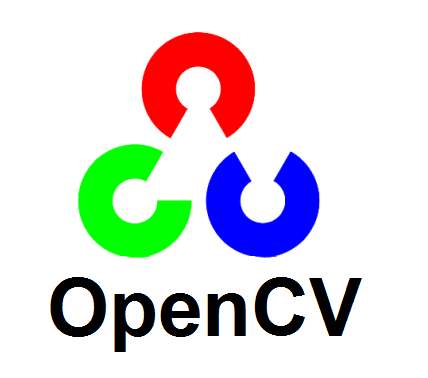

In [5]:
from IPython.core.display import Image 
Image('opencv.png') 

## What is OpenCV?

OpenCV is

* open source
* computer vision
* built in C++

## OpenCV Basics

* Image representation and data structures

* Arithmetic image operations

* Histograms

* Image thresholding, smoothing, and edge detection

* Motion tracking (optical flow)

## 1 - Image representation and data structures

Images are stored as matrices using NumPy arrays.

In [23]:
import cv2
import numpy as np

img = cv2.imread('opencv.png')

You can access a pixel value by its row and column coordinates. By default, images are loaded as BGR; each pixel will have a blue, green, and red value.

In [22]:
# This is a pixel in the blue section.
print img[250, 250]

[255   0   0]


Alternatively, you can explicitly force a grayscale image, in which case each pixel will be a single number in the range (0, 255).

In [18]:
img_gray = cv2.imread('opencv.png', cv2.CV_LOAD_IMAGE_GRAYSCALE)
print img_gray[250, 250]

95


Like all NumPy arrays, images have shapes (also an easy way to know whether your image is grayscale or BGR).

In [19]:
print img.shape

(378, 428, 3)


In [20]:
print img_gray.shape

(378, 428)


In [21]:
print img.dtype

uint8


You also have access to all the array slicing you know and love from NumPy arrays.

Populating the interactive namespace from numpy and matplotlib


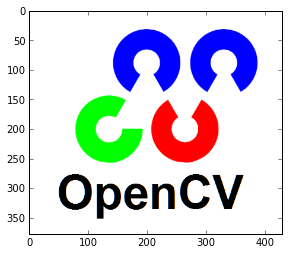

In [24]:
%pylab inline
icon = img[31:140, 140:260]
img[31:140, 270:390] = icon
imshow(img)

You can split the color channels if you want to work with each individually (cell segmentation, etc).

In [25]:
b, g, r = cv2.split(img)
img = cv2.merge((b, g, r))

Alternatively, in true NumPy fashion

In [26]:
b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]

If speed is an issue, or you're working with large images, use NumPy indexing; `split` is, by comparison, slow.

## 2 - Arithmetic Image Operations

Images can be added and subtracted (just like NumPy arrays).

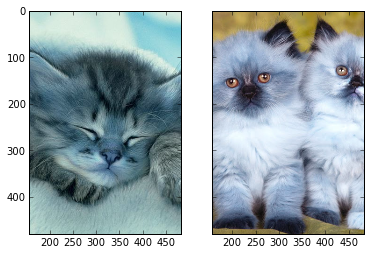

In [37]:
cats1 = cv2.imread('cats1.jpg')
cats2 = cv2.imread('cats2.jpg')
fig, ax = subplots(1, 2, sharey = True)
ax[0].imshow(cats1)
ax[1].imshow(cats2)

In [38]:
res = cv2.add(cats1, cats2)

Note that, because images are of type `uint8`, the maximum value is `255`

In [29]:
x = np.uint8([250])
y = np.uint8([10])
print cv2.add(x, y)

[[255]]


You may be tempted to use NumPy operations to add and subtract images. Try to resist.

In [31]:
# OpenCV: 250 + 10 = 255
print cv2.add(x, y)

[[255]]


In [32]:

# NumPy: 250 + 10 = 260 % 256 = 4
print x + y

[4]


NumPy addition is a modulo operation if overflow is detected. By contrast, OpenCV addition is a saturated operation. Stick to OpenCV for performing image arithmetic.

## 2 - Arithmetic Image Operations

Images can also be blended, referring to a weighted combination (as opposed to straight addition or subtraction).

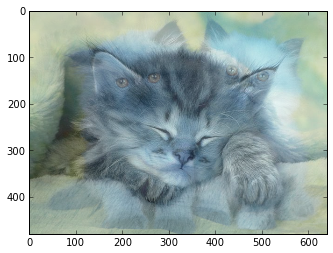

In [35]:
res = cv2.addWeighted(cats1, 0.7, cats2, 0.3, 0)
imshow(res)

## 3 - Histograms

* Learn the distribution of intensities in an image
* Locate objects
* Segment images
* Enhance contrast
* ...

## 3 - Histograms

Let's load up our cat image from before.

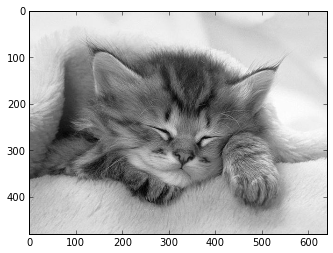

In [40]:
cats = cv2.imread('cats1.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE)

import matplotlib.cm as cm
imshow(cats, cmap = cm.gray)

Computing image histograms in OpenCV

In [44]:
hist_edges = cv2.calcHist([cats], [0], None, [256], [0, 256])

Computing image histograms in NumPy

In [45]:
hist_edges, bins = np.histogram(cats.ravel(), 256, [0, 256])

A couple of important differences:

* The OpenCV method is, again, quite a bit faster than the NumPy version.
* The `hist` value from NumPy has **257** elements (each bin computed as 0-0.99, 1-1.99, etc), where the OpenCV value has only **256**. This is important for plotting.
* NumPy has another method, `bincount`, which is quite a bit faster than `histogram`.

(array([   2,    2,    8,   13,   19,   34,   33,   43,   60,   39,   58,
         85,   91,  109,  118,  122,  146,  160,  177,  190,  201,  185,
        187,  189,  232,  191,  193,  217,  211,  235,  221,  277,  244,
        276,  288,  304,  364,  336,  401,  399,  410,  440,  452,  453,
        442,  489,  539,  574,  557,  585,  594,  698,  680,  681,  714,
        813,  837,  902,  881,  904,  892,  946,  940,  962,  988,  948,
        997, 1018, 1017, 1056, 1130, 1099, 1179, 1192, 1154, 1182, 1271,
       1295, 1372, 1336, 1368, 1391, 1450, 1425, 1421, 1398, 1420, 1399,
       1471, 1502, 1566, 1540, 1537, 1476, 1492, 1618, 1562, 1582, 1636,
       1689, 1632, 1648, 1600, 1592, 1589, 1599, 1635, 1590, 1476, 1515,
       1536, 1418, 1461, 1384, 1383, 1465, 1332, 1401, 1267, 1346, 1277,
       1268, 1151, 1207, 1178, 1153, 1136, 1114, 1102, 1124, 1191, 1161,
       1128, 1139, 1088, 1110, 1055, 1070, 1047, 1038, 1038, 1013,  975,
        944,  963,  988,  897,  922,  954,  897,  

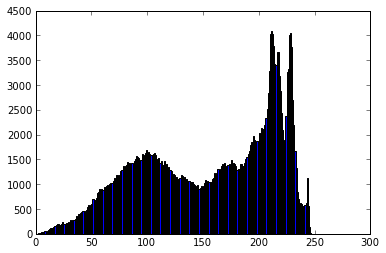

In [48]:
hist(cats.ravel(), 256, [0, 256])

## 3 - Histograms

*Equalization* is an important concept in the context of image histograms.

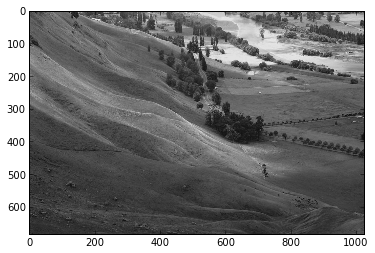

In [52]:
img = cv2.imread('wiki.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE)
imshow(img, cmap = cm.gray)

(array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     1,     1,    12,
          19,    49,    93,   220,   488,  1061,  1747,  2160,  2718,
        3259,  4039

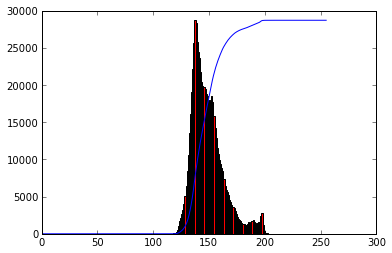

In [51]:
edges, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = edges.cumsum()
cdf_norm = cdf * edges.max() / cdf.max()

plot(cdf_norm, color = 'b')
hist(img.ravel(), 256, [0, 256], color = 'r')

Equalization smooths out the CDF of the image histogram, making it as close to a straight line as possible. This has the effect of improving the image contrast.

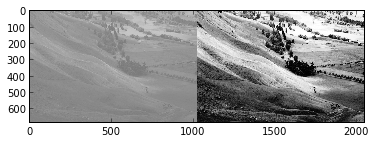

In [54]:
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
imshow(res, cmap = cm.gray)

(array([  883,  2808,  2160,  2718,  3259,     0,  4039,     0,  5108,
           0,  6395,     0,     0,  8463,     0,     0,     0, 10610,
           0,     0,     0,     0, 13530,     0,     0,     0,     0,
           0, 16115,     0,     0,     0,     0,     0,     0, 19125,
           0,     0,     0,     0,     0,     0,     0, 22186,     0,
           0,     0,     0,     0,     0,     0,     0, 25696,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
       28701,     0,     0,     0,     0,     0,     0,     0,     0,
           0, 28324,     0,     0,     0,     0,     0,     0,     0,
           0, 25759,     0,     0,     0,     0,     0,     0,     0,
           0, 24369,     0,     0,     0,     0,     0,     0,     0,
           0, 23578,     0,     0,     0,     0,     0,     0,     0,
       21775,     0,     0,     0,     0,     0,     0, 20385,     0,
           0,     0,     0,     0,     0, 19839,     0,     0,     0,
           0,     0

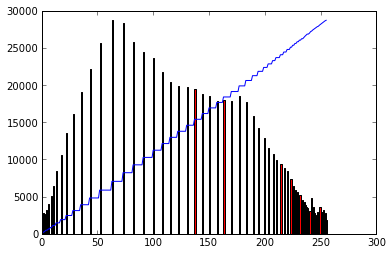

In [56]:
edges, bins = np.histogram(equ.ravel(), 256, [0, 256])
cdf = edges.cumsum()
cdf_norm = cdf * edges.max() / cdf.max()

plot(cdf_norm, color = 'b')
hist(equ.ravel(), 256, [0, 256], color = 'r')

## 4 - Image thresholding, smoothing, and edge detection

OpenCV has several thresholding methods built in.

* `cv2.THRESH_BINARY`
* `cv2.THRESH_BINARY_INV`
* `cv2.THRESH_TRUNC`
* `cv2.THRESH_TOZERO`
* `cv2.THRESH_TOZERO_INV`

These are tailored specifically to hard pixel values (that is, *not* adaptive).

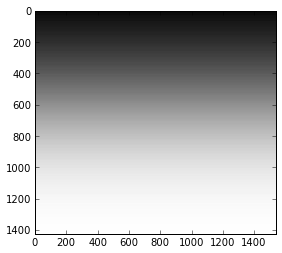

In [57]:
img = cv2.imread('bwgradient.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE)
imshow(img, cmap = cm.gray)

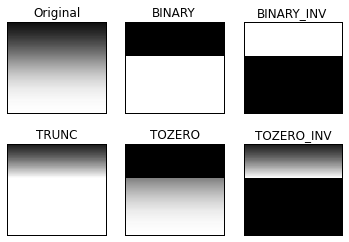

In [61]:
ret, t1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, t2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, t3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, t4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, t5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, t1, t2, t3, t4, t5]

for i in range(6):
    subplot(2, 3, i + 1)
    imshow(images[i], cmap = cm.gray)
    title(titles[i])
    xticks([])
    yticks([])

## 4 - Image thresholding, smoothing, and edge detection

### Thresholding

OpenCV also has two *adaptive* thresholding methods.

* `cv2.ADAPTIVE_THRESH_MEAN_C`
* `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`

`THRESH_MEAN` is the mean of a neighborhood area, while `THRESH_GAUSSIAN` is the weighted sum of a neighborhood according to a gaussian window.

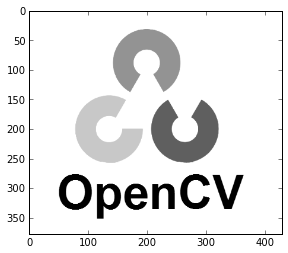

In [65]:
img = cv2.imread('opencv.png', cv2.CV_LOAD_IMAGE_GRAYSCALE)
imshow(img, cmap = cm.gray)

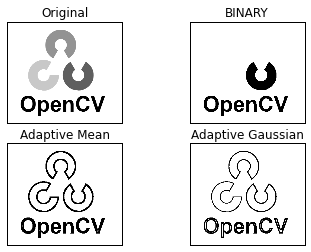

In [67]:
ret, t1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
t2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
t3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original', 'BINARY', 'Adaptive Mean', 'Adaptive Gaussian']
images = [img, t1, t2, t3]

for i in range(4):
    subplot(2, 2, i + 1)
    imshow(images[i], cmap = cm.gray)
    title(titles[i])
    xticks([])
    yticks([])

### Smoothing

Smoothing is a useful preprocessing step (prior to segmentation or thresholding) or to simply suppress spurious pixel noise.

Smoothing relies on a *kernel*, or filter, that specifies how the smoothing is done.

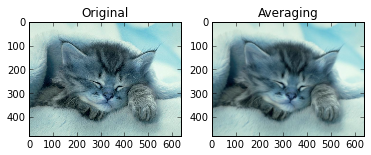

In [68]:
cats = cv2.imread('cats1.jpg')
kernel = np.ones((5, 5), np.float32) / 25

# Average smoothing: takes the average of all pixels under the filter
dst = cv2.filter2D(cats, -1, kernel)

subplot(121)
imshow(cats)
title('Original')
subplot(122)
imshow(dst)
title('Averaging')

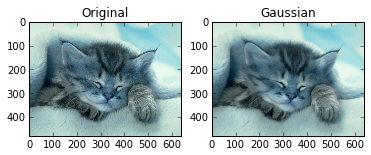

In [69]:
# Gaussian filter: averages each pixel under a filter, weighted by a gaussian
dst = cv2.GaussianBlur(cats, (5, 5), 0)
subplot(121)
imshow(cats)
title('Original')
subplot(122)
imshow(dst)
title('Gaussian')

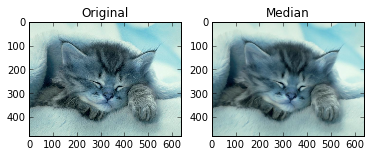

In [70]:
# Median filter: takes the median value under the filter
dst = cv2.medianBlur(cats, 5)
subplot(121)
imshow(cats)
title('Original')
subplot(122)
imshow(dst)
title('Median')

### Edge Detection

* Useful for image segmentation
* Often done after smoothing

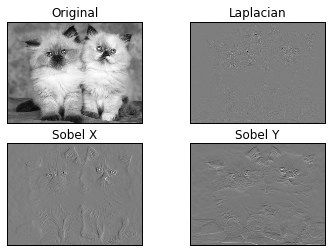

In [77]:
img = cv2.imread('cats2.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)

titles = ['Original', 'Laplacian', 'Sobel X', 'Sobel Y']
images = [img, laplacian, sobelx, sobely]

for i in range(4):
    subplot(2, 2, i + 1)
    imshow(images[i], cmap = cm.gray)
    title(titles[i])
    xticks([])
    yticks([])

Canny edge detection is the most popular method for finding edges in an image. It operates by using a *dual threshold* and then connects the edges into an edge map.

([], <a list of 0 Text yticklabel objects>)

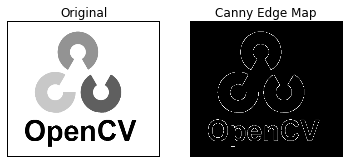

In [82]:
img = cv2.imread('opencv.png', cv2.CV_LOAD_IMAGE_GRAYSCALE)
edges = cv2.Canny(img, 50, 150)

subplot(121)
imshow(img, cmap = cm.gray)
title('Original')
xticks([])
yticks([])

subplot(122)
imshow(edges, cmap = cm.gray)
title('Canny Edge Map')
xticks([])
yticks([])

## 5 - Optical flow

Optical flow refers to tracking motion in videos.

1. Stand a pixel at a certain frame (or time *t*).
2. In the next frame (or time point *t + 1*), find where the pixel "moved".
3. Draw a vector connecting the two.
4. Repeat for each pixel, for each pair of frames.

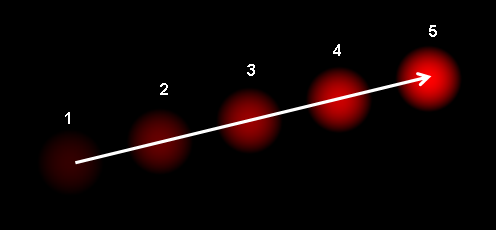

In [84]:
# Image courtesy of Wikipedia's article on optical flow.
# http://en.wikipedia.org/wiki/Optical_flow

from IPython.core.display import Image 
Image('opticalflow.png') 

## 5 - Optical flow

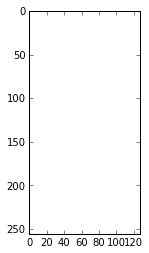

In [8]:
import matplotlib.animation as animation
import matplotlib.pyplot as plot
import matplotlib.cm as cm

fig = figure()

video = cv2.VideoCapture('normal.avi')
num_frames = int(video.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
width = int(video.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT))

i = 0
frames = np.zeros(shape = (num_frames, height, width))
sequence = []
while video.grab() and i < num_frames:
    flag, f = video.retrieve()
    if not flag:
        quit('Failed to extract frame.')
    frame = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
    frames[i, :, :] = frame
    sequence.append([imshow(frame, cmap = cm.gray)])
    i += 1
anim = animation.ArtistAnimation(fig, sequence, interval = 200, blit = True, repeat = True)
video.release()

From the frames of the video, we can compute optical flow by operating on pairs of frames.

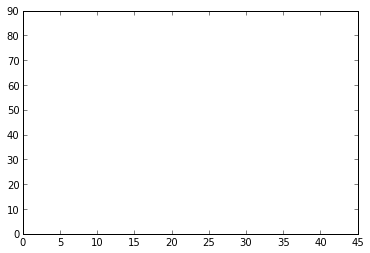

In [9]:
sequence = []
fig = plot.figure()
for i in range(1, frames.shape[0]):
    prev = frames[i - 1]
    curr = frames[i]
    
    opt = cv2.calcOpticalFlowFarneback(prev, curr, 0.5, 2, 32, 4, 5, 1.1, cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
    x = opt[:, :, 0]
    y = opt[:, :, 1]
    sequence.append([quiver(x[::3, ::3], y[::3, ::3])])
anim = animation.ArtistAnimation(fig, sequence, interval = 200, blit = True, repeat = True)

## Conclusion

Each has its own strengths (scikit-image natively uses NumPy / SciPy for basic image operations; mahotas good for scientific computing), but OpenCV has significantly greater breadth.

# Thank you!